# Análise de dados do mercado do CartolaFC

In [122]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

## Coleta dos dados

In [2]:
status = requests.get('https://api.cartolafc.globo.com/mercado/status').json()
status

{'rodada_atual': 27,
 'status_mercado': 1,
 'esquema_default_id': 4,
 'cartoleta_inicial': 100,
 'max_ligas_free': 1,
 'max_ligas_pro': 10,
 'max_ligas_matamata_free': 5,
 'max_ligas_matamata_pro': 10,
 'max_ligas_patrocinadas_free': 2,
 'max_ligas_patrocinadas_pro_num': 2,
 'game_over': False,
 'temporada': 2021,
 'reativar': True,
 'exibe_sorteio_pro': False,
 'fechamento': {'dia': 16,
  'mes': 10,
  'ano': 2021,
  'hora': 18,
  'minuto': 30,
  'timestamp': 1634419800},
 'limites_competicao': {'total_confronto_pro': 7,
  'total_confronto_free': 3,
  'criacao_confronto_pro': 7,
  'criacao_confronto_free': 1},
 'times_escalados': 650567,
 'mercado_pos_rodada': True,
 'novo_mes_ranking': False}

In [3]:
mercado = requests.get('https://api.cartolafc.globo.com/atletas/mercado').json()
type(mercado)

dict

In [4]:
atletas_mercado = pd.DataFrame.from_dict(mercado['atletas'])
atletas_mercado

,scout,atleta_id,rodada_id,clube_id,posicao_id,status_id,pontos_num,preco_num,variacao_num,media_num,jogos_num,slug,apelido,apelido_abreviado,nome,foto
0,{},70323,26,1371,6,7,5.08,4.82,0.39,3.24,16,jorginho,Jorginho,Jorginho,Jorge Amorim de Oliveira Campos,https://s.glbimg.com/es/sde/f/2021/04/27/ed89b...
1,"{'A': 4, 'CA': 4, 'DS': 32, 'FC': 17, 'FD': 9,...",86264,26,373,2,6,0.40,12.98,-0.71,4.63,19,natanael,Natanael,Natanael,Natanael Batista Pimenta,https://s.glbimg.com/es/sde/f/2021/05/01/8d7a4...
2,"{'A': 1, 'CA': 1, 'DS': 11, 'FC': 21, 'FD': 9,...",61033,26,265,4,6,0.00,5.77,0.04,2.25,23,rodriguinho,Rodriguinho,Rodriguinho,Rodrigo Eduardo Costa Marinho,https://s.glbimg.com/es/sde/f/2021/04/19/d6687...
3,"{'CA': 1, 'DS': 1, 'FC': 2, 'FD': 2, 'FS': 1, ...",38231,26,277,5,6,-0.20,4.54,0.50,0.00,4,diego-tardelli,Diego Tardelli,D. Tardelli,Diego Tardelli Martins,https://s.glbimg.com/es/sde/f/2021/08/27/3054f...
4,"{'DE': 34, 'FS': 5, 'GS': 15, 'SG': 4}",71631,26,275,1,7,0.00,14.76,0.00,3.46,12,weverton,Weverton,Weverton,Weverton Pereira da Silva,https://s.glbimg.com/es/sde/f/2021/04/30/33d63...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,"{'CA': 1, 'DS': 5, 'FC': 7, 'FD': 4, 'FF': 1, ...",113158,26,276,5,6,1.40,1.79,0.24,0.79,8,marquinhos,Marquinhos,Marquinhos,Marcus Vinícius Oliveira Alencar,https://s.glbimg.com/es/sde/f/2021/07/22/1a77b...
808,"{'DS': 1, 'FC': 5, 'FD': 1, 'FS': 2, 'PI': 4}",111361,26,292,5,6,0.00,0.90,0.00,0.15,2,cristiano,Cristiano,Cristiano,Cristiano Robert do Amaral,https://s.glbimg.com/es/sde/f/2021/08/28/0281e...
809,{},104424,26,284,1,6,0.00,1.00,0.00,0.00,0,felipe,Felipe,Felipe,Felipe Mateus Scheibig,https://s.glbimg.com/es/sde/f/2021/07/16/79af8...
810,"{'CA': 2, 'DS': 3, 'FC': 5, 'FS': 1, 'PI': 6}",112379,26,284,4,6,1.00,0.79,0.02,-0.90,4,mateus-sarara,Mateus Sarará,M. Sarará,Mateus Ferreira,https://s.glbimg.com/es/sde/f/2021/07/16/1a614...


## Histograma de médias de pontos e preço

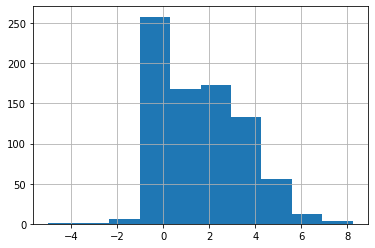

In [5]:
hist_medias = atletas_mercado['media_num'].hist()

In [6]:
fig = hist_medias.get_figure()
fig.savefig('histograma.png')

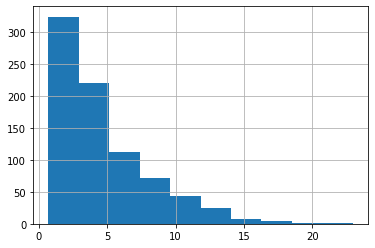

In [7]:
hist_preco = atletas_mercado['preco_num'].hist()

In [8]:
fig = hist_preco.get_figure()
fig.savefig('histograma_preco.png')

## Médias dos jogadores que jogaram 10 ou mais jogos

In [9]:
selecao = atletas_mercado['jogos_num'] > 9

In [10]:
atletas_10 = atletas_mercado[selecao]

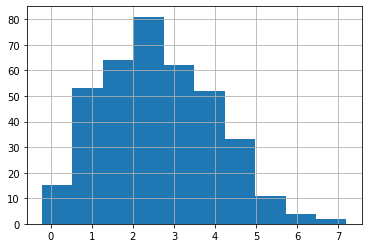

In [11]:
hist = atletas_10['media_num'].hist()

In [12]:
fig = hist.get_figure()
fig.savefig('histograma_10.png')

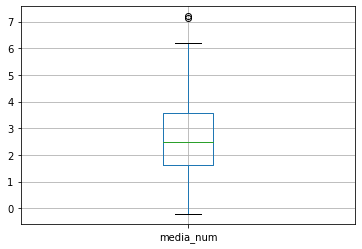

In [13]:
boxplot = atletas_10.boxplot(['media_num'])

## Comparar médias de jogadores com base no preço

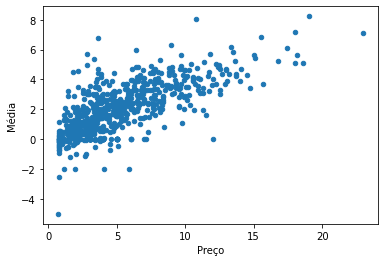

In [14]:
plot = atletas_mercado.plot(x='preco_num', y='media_num', kind='scatter', xlabel='Preço', ylabel='Média')

In [15]:
atletas_mercado.mean(numeric_only=True)

atleta_id       92182.488916
rodada_id          26.000000
clube_id          344.905172
posicao_id          3.529557
status_id           5.975369
pontos_num          0.961034
preco_num           4.566564
variacao_num       -0.000086
media_num           1.670037
jogos_num           9.230296
dtype: float64

## Quais posições pontuam mais?

In [16]:
atletas_por_posicao = atletas_mercado.groupby('posicao_id')

In [17]:
media_posicoes = atletas_por_posicao.mean()['media_num']
media_posicoes

posicao_id
1    1.328046
2    2.188000
3    1.636350
4    1.472586
5    1.585417
6    3.485000
Name: media_num, dtype: float64

In [18]:
media_posicoes.index

Int64Index([1, 2, 3, 4, 5, 6], dtype='int64', name='posicao_id')

In [19]:
posicoes = pd.DataFrame.from_dict(mercado['posicoes'], orient='index')

In [20]:
posicoes.set_index('id', inplace=True)

In [21]:
posicoes

,nome,abreviacao
id,,
1,Goleiro,gol
2,Lateral,lat
3,Zagueiro,zag
4,Meia,mei
5,Atacante,ata
6,Técnico,tec


In [22]:
media_posicoes.index = posicoes['nome']

In [23]:
media_posicoes = media_posicoes.to_frame()

In [60]:
media_posicoes = media_posicoes.rename(columns={'media_num':'Média'}).rename_axis('Posições')
media_posicoes

,Média
Posições,
Goleiro,1.328046
Lateral,2.188000
Zagueiro,1.636350
Meia,1.472586
Atacante,1.585417
Técnico,3.485000


<AxesSubplot:title={'center':'Média por Posição'}, xlabel='Posições'>

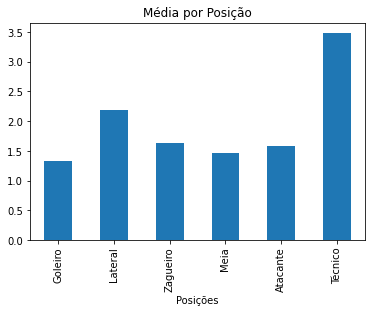

In [25]:
media_posicoes.plot(kind='bar', title='Média por Posição', legend=False)

## Quais as médias dos times?

In [26]:
atletas_por_time = atletas_mercado.groupby('clube_id')

In [27]:
clubes = mercado['clubes']
clubes = pd.DataFrame.from_dict(clubes, orient='index').set_index('id')
clubes

,nome,abreviacao,escudos,nome_fantasia
id,,,,
1371,Cuiabá,CUI,{'60x60': 'https://s.glbimg.com/es/sde/f/organ...,Cuiabá
262,Flamengo,FLA,{'60x60': 'https://s.glbimg.com/es/sde/f/organ...,Flamengo
264,Corinthians,COR,{'60x60': 'https://s.glbimg.com/es/sde/f/organ...,Corinthians
265,Bahia,BAH,{'60x60': 'https://s.glbimg.com/es/sde/f/organ...,Bahia
266,Fluminense,FLU,{'60x60': 'https://s.glbimg.com/es/sde/f/organ...,Fluminense
275,Palmeiras,PAL,{'60x60': 'https://s.glbimg.com/es/sde/f/organ...,Palmeiras
276,São Paulo,SAO,{'60x60': 'https://s.glbimg.com/es/sde/f/organ...,São Paulo
277,Santos,SAN,{'60x60': 'https://s.glbimg.com/es/sde/f/organ...,Santos
280,Bragantino,BGT,{'60x60': 'https://s.glbimg.com/es/sde/f/organ...,Bragantino


In [28]:
media_por_time = atletas_por_time['media_num'].mean()
media_por_time

clube_id
262     2.298696
264     1.685250
265     1.863500
266     1.496750
275     1.692128
276     1.589211
277     1.252444
280     2.002308
282     2.335000
284     1.629524
285     2.018919
286     1.305000
292     1.372821
293     1.523250
315     1.144681
327     1.512200
354     1.697073
356     2.188000
373     1.603784
1371    1.427368
Name: media_num, dtype: float64

In [29]:
media_por_time = clubes.join(media_por_time).drop(columns=['abreviacao', 'escudos', 'nome_fantasia']).sort_values('media_num', ascending=False)
media_por_time

,nome,media_num
id,,
282,Atlético-MG,2.335000
262,Flamengo,2.298696
356,Fortaleza,2.188000
285,Internacional,2.018919
280,Bragantino,2.002308
265,Bahia,1.863500
354,Ceará,1.697073
275,Palmeiras,1.692128
264,Corinthians,1.685250


<AxesSubplot:ylabel='Média de Pontos'>

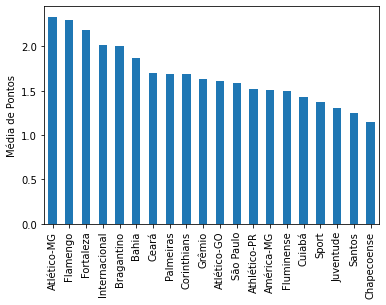

In [30]:
media_por_time.plot(x='nome', y='media_num', kind='bar', legend=False, xlabel='', ylabel='Média de Pontos')

## Quais scouts pontuam mais para cada posição?

In [31]:
all_scouts = {}
for i in range(5):
    all_scouts[i+1] = {}
    selecao = (atletas_mercado['posicao_id'] == i+1) & (atletas_mercado['scout'] != {})
    for row in atletas_mercado[selecao].iterrows():
        scout_dict = row[1].scout
        for scout, count in scout_dict.items():
            if scout not in all_scouts[i+1].keys():
                all_scouts[i+1][scout] = count
            else: all_scouts[i+1][scout] += count
print(all_scouts)

{1: {'DE': 1534, 'FS': 79, 'GS': 548, 'SG': 159, 'CA': 37, 'DP': 10, 'DS': 15, 'FC': 2, 'CV': 3, 'PC': 5}, 2: {'A': 81, 'CA': 182, 'DS': 2215, 'FC': 1270, 'FD': 143, 'FF': 259, 'FS': 1060, 'FT': 15, 'I': 71, 'PC': 19, 'PI': 9047, 'SG': 374, 'G': 25, 'CV': 6, 'GC': 3, 'PP': 1, 'PS': 3}, 3: {'CA': 170, 'DS': 1575, 'FC': 1080, 'FD': 103, 'FF': 219, 'FS': 643, 'PI': 4537, 'SG': 351, 'CV': 12, 'G': 33, 'A': 24, 'PC': 24, 'I': 46, 'FT': 12, 'PS': 4, 'GC': 6}, 4: {'A': 148, 'CA': 355, 'DS': 3687, 'FC': 2599, 'FD': 493, 'FF': 876, 'FS': 2455, 'FT': 55, 'G': 157, 'I': 125, 'PI': 10612, 'PP': 5, 'CV': 14, 'PS': 13, 'PC': 7, 'GC': 1}, 5: {'CA': 264, 'DS': 1461, 'FC': 1983, 'FD': 679, 'FS': 2312, 'PI': 7270, 'A': 124, 'FF': 1015, 'FT': 54, 'G': 295, 'I': 420, 'PC': 9, 'PS': 22, 'CV': 12, 'PP': 7}}


In [95]:
scout_df = pd.DataFrame.from_dict(all_scouts)
scout_df.columns = ['goleiro', 'lateral', 'zagueiro', 'meia', 'atacante']
scout_df

,goleiro,lateral,zagueiro,meia,atacante
DE,1534.0,NaN,NaN,NaN,NaN
FS,79.0,1060.0,643.0,2455.0,2312.0
GS,548.0,NaN,NaN,NaN,NaN
SG,159.0,374.0,351.0,NaN,NaN
CA,37.0,182.0,170.0,355.0,264.0
DP,10.0,NaN,NaN,NaN,NaN
DS,15.0,2215.0,1575.0,3687.0,1461.0
FC,2.0,1270.0,1080.0,2599.0,1983.0
CV,3.0,6.0,12.0,14.0,12.0
PC,5.0,19.0,24.0,7.0,9.0


In [108]:
valores_scout = pd.Series([1.0, 0.5, (-1.0), 5.0, (-2.0), 7.0, 1.0, (-0.5), (-5.0), (-1.0), 5.0, 1.2, 0.8, 3.0, (-0.5), (-0.1), 8.0, (-5.0), (-4.0), 1.0]) #adicionar valor de cada scout
valores_scout.index = scout_df.index
valores_scout

DE    1.0
FS    0.5
GS   -1.0
SG    5.0
CA   -2.0
DP    7.0
DS    1.0
FC   -0.5
CV   -5.0
PC   -1.0
A     5.0
FD    1.2
FF    0.8
FT    3.0
I    -0.5
PI   -0.1
G     8.0
GC   -5.0
PP   -4.0
PS    1.0
dtype: float64

In [134]:
scout_df = scout_df.mul(valores_scout, axis=0)
scout_df

,goleiro,lateral,zagueiro,meia,atacante
DE,1534.00,NaN,NaN,NaN,NaN
FS,19.75,265.00,160.75,613.75,578.00
GS,548.00,NaN,NaN,NaN,NaN
SG,3975.00,9350.00,8775.00,NaN,NaN
CA,148.00,728.00,680.00,1420.00,1056.00
DP,490.00,NaN,NaN,NaN,NaN
DS,15.00,2215.00,1575.00,3687.00,1461.00
FC,0.50,317.50,270.00,649.75,495.75
CV,75.00,150.00,300.00,350.00,300.00
PC,5.00,19.00,24.00,7.00,9.00


AxesSubplot(0.125,0.749828;0.775x0.130172)
AxesSubplot(0.125,0.593621;0.775x0.130172)
AxesSubplot(0.125,0.437414;0.775x0.130172)
AxesSubplot(0.125,0.281207;0.775x0.130172)
AxesSubplot(0.125,0.125;0.775x0.130172)


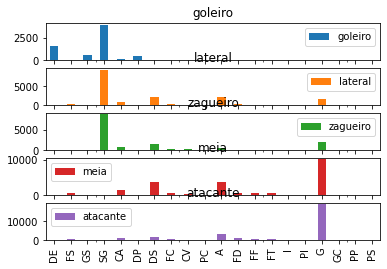

In [163]:
for i in scout_df.plot(kind='bar', subplots=True):
    print(i)

In [159]:
scout_df.max(axis=0)

goleiro      3975.0
lateral      9350.0
zagueiro     8775.0
meia        10048.0
atacante    18880.0
dtype: float64